<h1 align='center'> DNN Training </h1>
<hr>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sn
import os
#from keras.models import Sequential
#from keras.layers import Dense
%matplotlib inline

## Combining the two neg and pos csv and random sampling

In [2]:
def sampling_dataset(base_path):
    # reading the data from all the 

    data = []
    data_files = os.listdir(base_path)

    for file in data_files:
        file_path = os.path.join(base_path, file)
        print(file_path)
        df = pd.read_csv(file_path, sep=',', header=None)
        data.extend(df.values.tolist())
        print(len(data))
            
    data_arr = np.asarray(data)
    #shuffle the data
    data_arr = data_arr[np.random.permutation(data_arr.shape[0])]
    
    #separating into features and labels
    _data, _labels = data_arr[:, :-1], data_arr[:,-1]
                                 
    #convert the labels into one hot encoding
    #one_hot_encoded_labels = tf.keras.utils.to_categorical(_labels, num_classes=7)
                             
    return _data, _labels

In [3]:
pwd

'/home/chakradhar/student_behavior_engagement/Multimodular'

In [4]:
X_train, y_train = sampling_dataset('pck_data1/train csv multimodal')
X_test, y_test = sampling_dataset('pck_data1/test csv multimodal')
print("Training dataset shape: ", X_train.shape, y_train.shape)
print("Testing dataset shape: ", X_test.shape, y_test.shape)

pck_data1/train csv multimodal/neg.csv
8380
pck_data1/train csv multimodal/pos.csv
15432
pck_data1/test csv multimodal/neg.csv
846
pck_data1/test csv multimodal/pos.csv
1710
Training dataset shape:  (15432, 94) (15432,)
Testing dataset shape:  (1710, 94) (1710,)


In [16]:
X0_test, y0_test = sampling_dataset('pck_data/test csv multimodal')

pck_data/test csv multimodal/neg.csv
333
pck_data/test csv multimodal/pos.csv
787


In [5]:
y_train[:5], y_test[:5]

(array([0., 1., 1., 0., 1.]), array([0., 1., 0., 1., 1.]))

In [6]:
print(y_train.dtype)

float64


## Splitting into Train and Validation 

In [7]:
total_data = X_train.shape[0]
split = int(total_data * 0.2)
#split = 0

#split into train and test
x_validation, x_train = X_train[:split], X_train[split:]
y_validation, y_train = y_train[:split], y_train[split:]

print("Training dataset shape: ", x_train.shape, y_train.shape)
print("Testing dataset shape: ", x_validation.shape, y_validation.shape)

Training dataset shape:  (12346, 94) (12346,)
Testing dataset shape:  (3086, 94) (3086,)


In [8]:
import collections
print(collections.Counter(y_train))
print(collections.Counter(y_test))
print(collections.Counter(y_validation))

Counter({0.0: 6715, 1.0: 5631})
Counter({1.0: 864, 0.0: 846})
Counter({0.0: 1665, 1.0: 1421})


## Training the DNN Model

#### Training 

In [9]:
# Model

model_t = tf.keras.models.Sequential()

model_t.add(tf.keras.layers.Dense(256,activation='relu', input_shape=(94,)))
model_t.add(tf.keras.layers.BatchNormalization())
model_t.add(tf.keras.layers.Dropout(0.5))
model_t.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.3))
model_t.add(tf.keras.layers.Dense(64,activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model_t.add(tf.keras.layers.Dropout(0.2))
model_t.add(tf.keras.layers.Dense(32,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model_t.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_t.summary()

model_t.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               24320     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

2022-07-29 12:14:24.686395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 12:14:24.693023: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 12:14:24.693847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-29 12:14:24.695260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
history_t = model_t.fit(x_train, y_train, 
                    epochs=500, batch_size=16, validation_data = (x_validation, y_validation), verbose=1)

Epoch 1/500
 84/772 [==>...........................] - ETA: 1s - loss: 0.6509 - accuracy: 0.6369

2022-07-29 12:14:33.371712: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


772/772 [==============================] - 3s 2ms/step - loss: 0.5728 - accuracy: 0.6882 - val_loss: 0.5005 - val_accuracy: 0.7602
Epoch 2/500
772/772 [==============================] - 2s 2ms/step - loss: 0.5191 - accuracy: 0.7334 - val_loss: 0.4712 - val_accuracy: 0.7777
Epoch 3/500
772/772 [==============================] - 2s 2ms/step - loss: 0.5009 - accuracy: 0.7527 - val_loss: 0.4679 - val_accuracy: 0.8075
Epoch 4/500
772/772 [==============================] - 2s 2ms/step - loss: 0.4818 - accuracy: 0.7624 - val_loss: 0.4417 - val_accuracy: 0.8014
Epoch 5/500
772/772 [==============================] - 2s 2ms/step - loss: 0.4678 - accuracy: 0.7712 - val_loss: 0.4259 - val_accuracy: 0.8095
Epoch 6/500
772/772 [==============================] - 2s 2ms/step - loss: 0.4614 - accuracy: 0.7776 - val_loss: 0.4350 - val_accuracy: 0.8153
Epoch 7/500
772/772 [==============================] - 2s 2ms/step - loss: 0.4502 - accuracy: 0.7813 - val_loss: 0.4185 - val_accuracy: 0.8095
Epoch 8/500

772/772 [==============================] - 2s 2ms/step - loss: 0.3485 - accuracy: 0.8424 - val_loss: 0.3232 - val_accuracy: 0.8623
Epoch 59/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3478 - accuracy: 0.8455 - val_loss: 0.3264 - val_accuracy: 0.8678
Epoch 60/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3387 - accuracy: 0.8479 - val_loss: 0.3243 - val_accuracy: 0.8626
Epoch 61/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3408 - accuracy: 0.8488 - val_loss: 0.3192 - val_accuracy: 0.8623
Epoch 62/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3385 - accuracy: 0.8532 - val_loss: 0.3125 - val_accuracy: 0.8642
Epoch 63/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3412 - accuracy: 0.8493 - val_loss: 0.3108 - val_accuracy: 0.8671
Epoch 64/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3352 - accuracy: 0.8530 - val_loss: 0.3189 - val_accuracy: 0.8668
Epoch

Epoch 115/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3054 - accuracy: 0.8678 - val_loss: 0.2878 - val_accuracy: 0.8769
Epoch 116/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.8698 - val_loss: 0.2838 - val_accuracy: 0.8804
Epoch 117/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.8700 - val_loss: 0.2882 - val_accuracy: 0.8795
Epoch 118/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3032 - accuracy: 0.8676 - val_loss: 0.2936 - val_accuracy: 0.8769
Epoch 119/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3064 - accuracy: 0.8672 - val_loss: 0.2905 - val_accuracy: 0.8814
Epoch 120/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2981 - accuracy: 0.8692 - val_loss: 0.2851 - val_accuracy: 0.8795
Epoch 121/500
772/772 [==============================] - 2s 2ms/step - loss: 0.3000 - accuracy: 0.8679 - val_loss: 0.2871 - val_ac

772/772 [==============================] - 2s 2ms/step - loss: 0.2592 - accuracy: 0.8886 - val_loss: 0.2550 - val_accuracy: 0.8892
Epoch 228/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2599 - accuracy: 0.8933 - val_loss: 0.2469 - val_accuracy: 0.8995
Epoch 229/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.8884 - val_loss: 0.2490 - val_accuracy: 0.9012
Epoch 230/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2590 - accuracy: 0.8907 - val_loss: 0.2542 - val_accuracy: 0.8924
Epoch 231/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2589 - accuracy: 0.8894 - val_loss: 0.2484 - val_accuracy: 0.9005
Epoch 232/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2643 - accuracy: 0.8837 - val_loss: 0.2522 - val_accuracy: 0.8989
Epoch 233/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.8907 - val_loss: 0.2521 - val_accuracy: 0.8950

772/772 [==============================] - 2s 2ms/step - loss: 0.2337 - accuracy: 0.9003 - val_loss: 0.2363 - val_accuracy: 0.9051
Epoch 340/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2363 - accuracy: 0.9001 - val_loss: 0.2295 - val_accuracy: 0.9080
Epoch 341/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2394 - accuracy: 0.9005 - val_loss: 0.2357 - val_accuracy: 0.9038
Epoch 342/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2379 - accuracy: 0.8996 - val_loss: 0.2359 - val_accuracy: 0.9054
Epoch 343/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2344 - accuracy: 0.8999 - val_loss: 0.2275 - val_accuracy: 0.9080
Epoch 344/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2375 - accuracy: 0.8996 - val_loss: 0.2310 - val_accuracy: 0.9060
Epoch 345/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2289 - accuracy: 0.9054 - val_loss: 0.2334 - val_accuracy: 0.9067

772/772 [==============================] - 2s 2ms/step - loss: 0.2259 - accuracy: 0.9047 - val_loss: 0.2267 - val_accuracy: 0.9086
Epoch 452/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2190 - accuracy: 0.9093 - val_loss: 0.2213 - val_accuracy: 0.9099
Epoch 453/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2246 - accuracy: 0.9087 - val_loss: 0.2237 - val_accuracy: 0.9109
Epoch 454/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2165 - accuracy: 0.9086 - val_loss: 0.2284 - val_accuracy: 0.9106
Epoch 455/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2150 - accuracy: 0.9106 - val_loss: 0.2252 - val_accuracy: 0.9112
Epoch 456/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2190 - accuracy: 0.9101 - val_loss: 0.2212 - val_accuracy: 0.9125
Epoch 457/500
772/772 [==============================] - 2s 2ms/step - loss: 0.2234 - accuracy: 0.9077 - val_loss: 0.2218 - val_accuracy: 0.9115

#### Training Plot 

In [11]:
# Graph section
def smooth_curve(points, factor=0.6):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    train_acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    train_loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    epochs = range(len(train_acc))
    
    plt.figure(figsize=(6, 4))
    plt.grid()
    plt.plot(epochs,train_loss,'r', label='Train Loss')
    plt.plot(epochs,val_loss,'b', label='Val Loss')
    #plt.xticks(range(0, len(loss), 5))
    #plt.xlim(0, len(loss))
    plt.ylabel('Loss',fontsize=12)
    plt.xlabel('Number of epochs')
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (train_loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    #plt.savefig(path+"_Loss.png",transparent=False,bbox_inches='tight')
    
    plt.figure(figsize=(6, 4))
    plt.grid()
    plt.plot(epochs,train_acc,'r',label='Train Acc')
    plt.plot(epochs,val_acc,'b', label='Val Acc')
    #plt.xticks(range(0, len(acc), 5))
    #plt.xlim(0, len(acc))
    plt.ylabel('Accuracy',fontsize=12)
    plt.xlabel('Number of epochs')
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (train_acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    #plt.savefig(path+"_Accuracy.png",transparent=False,bbox_inches='tight')

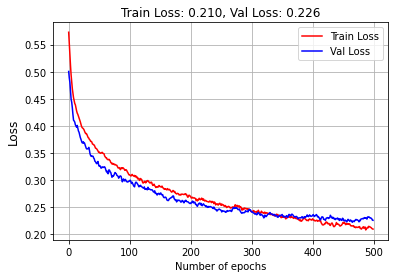

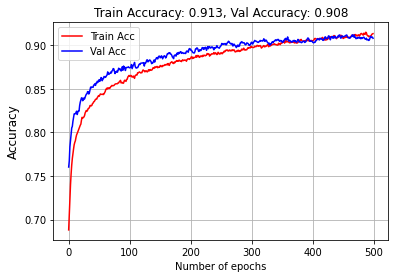

In [12]:
plot_compare(history=history_t)

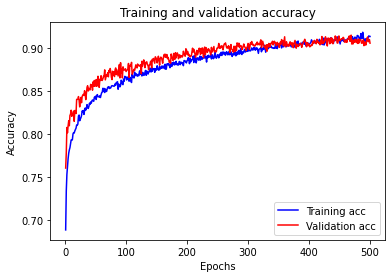

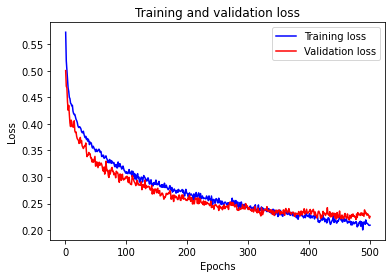

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

history = history_t
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values,'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy Score 

In [18]:
from sklearn.metrics import classification_report

y_pred = np.reshape(model_t.predict(X_test), (len(X_test)))
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print(classification_report(y_test, y_pred))

54/54 [==============================] - 0s 580us/step
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       846
         1.0       0.89      0.75      0.81       864

    accuracy                           0.82      1710
   macro avg       0.83      0.83      0.82      1710
weighted avg       0.83      0.82      0.82      1710



#### Confusion Metrics 

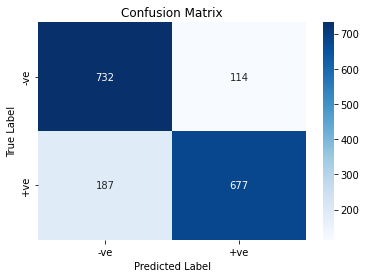

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ax = plt.axes()

labels = ['-ve', '+ve']

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt='g')

ax.set_title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### ROC Curve 

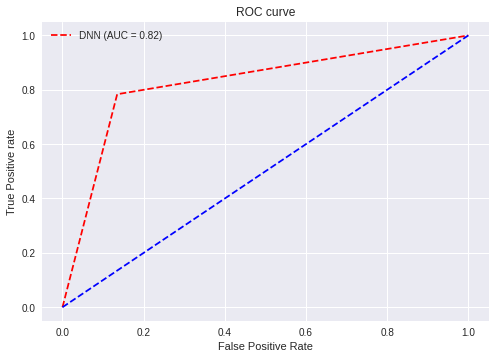

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# auc scores
auc_score = roc_auc_score(y_test, y_pred)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red', label='DNN (AUC = %0.2f)' % auc_score)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=400)
plt.show();